In [19]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [20]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-01-06 15:48:24--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-01-06 15:48:24 (105 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [21]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [22]:
dataset.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
dataset["sex"] = (dataset["sex"]=="female").astype(int)
dataset["smoker"] = (dataset["smoker"]=="yes").astype(int)
dataset["region"] = (dataset["region"].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3}))

In [24]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


In [25]:
dataset.region.unique()

array([0, 1, 2, 3])

In [27]:
train_dataset,test_dataset = np.split(dataset.sample(frac=1),[int(0.8*len(dataset))])

In [28]:
train_labels = train_dataset.pop("expenses")
train_labels

551      3972.92
956     41999.52
142     18972.50
1188    21771.34
235     19444.27
          ...   
1224     6858.48
332     13429.04
929      6289.75
83      11033.66
467     12643.38
Name: expenses, Length: 1070, dtype: float64

In [29]:
test_labels = test_dataset.pop("expenses")
test_labels

610      8547.69
1330    12629.17
1326     7050.02
424      8968.33
150      5125.22
          ...   
495      1967.02
1005     4433.39
1229    11938.26
1014     5383.54
262     24869.84
Name: expenses, Length: 268, dtype: float64

In [46]:
Norm = tf.keras.layers.Normalization()
Norm.adapt(np.array(train_dataset))
model_NN = tf.keras.Sequential([
    Norm,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1),

])
model_NN.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mae',metrics=["mae","mse"])

In [47]:
model_NN.fit(train_dataset,train_labels,epochs=100,batch_size=32)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12829.6836 - mae: 12829.6836 - mse: 302757408.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 11576.7939 - mae: 11576.7939 - mse: 270257728.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 8935.9424 - mae: 8935.9424 - mse: 199060240.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 5835.3848 - mae: 5835.3848 - mse: 123099296.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 4093.3508 - mae: 4093.3508 - mse: 76102256.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3420.1729 - mae: 3420.1729 - mse: 51280428.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 3325.3303 - mae: 3325.3303 - mse: 45704688.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3267.6633 - mae: 3267.6633 - mse: 43492560.0000
Epoch 9/100
34/34 [=====

9/9 - 0s - loss: 2340.0027 - mae: 2340.0027 - mse: 27412062.0000 - 146ms/epoch - 16ms/step
Testing set Mean Abs Error: 2340.00 expenses
You passed the challenge. Great job!


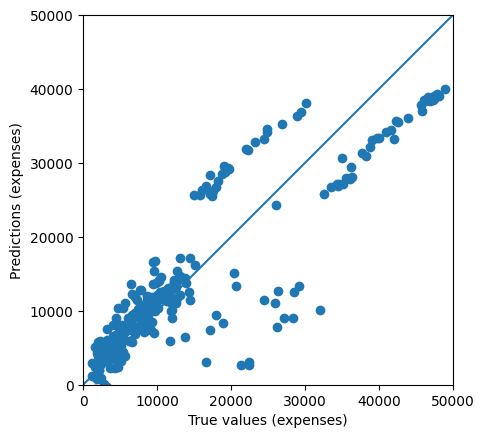

In [48]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model_NN.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
